In [5]:
import csv 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import os 
from os.path import isdir
from os.path import isfile

FOLDER = "/Users/fede/antlogs"

def load_fitnesses_novelty(filename,folder): 
    data_line = []
    if isfile(filename): 
        with open(filename) as file: 
            lines = file.readlines() 
            for line in lines: 
                values = line.split(',') 
                for i in range(3,len(values[:-1]),int(values[2])): #takes all values from each line (generation)
                    data_line.append([int(values[0]),int(values[1]),float(values[i]),float(values[i+1]),folder]) #"0 should be generation",1 "population size","fitness","novelty","replicate"
    else:
        return print("No file found")     
    
    return data_line

In [6]:
for folder in os.listdir(FOLDER):
    if isdir(folder):
        print(f"{folder} is a folder")
        print(type(folder))
    

arena_exploration_groups is a folder
<class 'str'>
arena_exploration_classic is a folder
<class 'str'>
.git is a folder
<class 'str'>


Folder arena_exploration_groups
Inside dataline arena_exploration_groups
Inside dataline arena_exploration_groups
Inside dataline arena_exploration_groups
Inside dataline arena_exploration_groups
Inside dataline arena_exploration_groups
Inside dataline arena_exploration_groups
Inside dataline arena_exploration_groups
Inside dataline arena_exploration_groups
Inside dataline arena_exploration_groups
Inside dataline arena_exploration_groups
Total of runs: 10
Folder arena_exploration_classic
Inside dataline arena_exploration_classic
Inside dataline arena_exploration_classic
Inside dataline arena_exploration_classic
Inside dataline arena_exploration_classic
Inside dataline arena_exploration_classic
Inside dataline arena_exploration_classic
Inside dataline arena_exploration_classic
Inside dataline arena_exploration_classic
Inside dataline arena_exploration_classic
Inside dataline arena_exploration_classic
Inside dataline arena_exploration_classic
Total of runs: 11
Folder .git
Total of runs: 

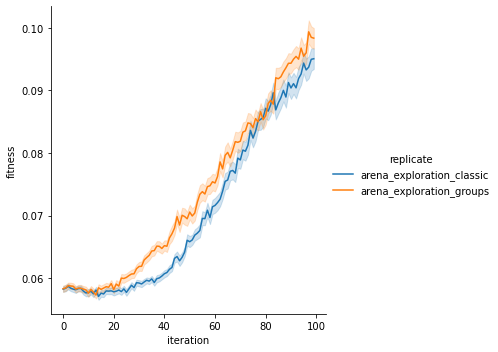

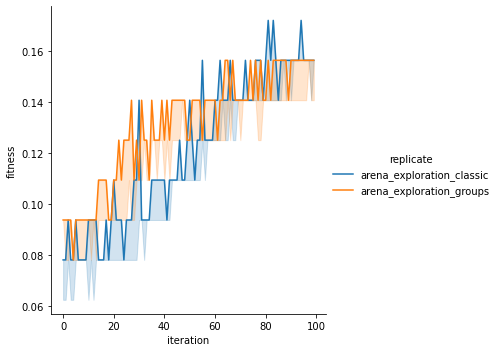

In [7]:
data_folder = FOLDER

minimal = False

for folder1 in os.listdir(data_folder):
    if isdir(folder1):
        print(f"Folder {folder1}")
        data_line = []
        
        run_counter = 0
        for folder2 in os.listdir(folder1): 
            
            pathToFile = data_folder + "/" + folder1 + "/" + folder2 + "/fitnesses.csv"

            if isfile(pathToFile):
                run_counter += 1
                if folder1 == "arena_exploration_classic":
                    print(f"Inside dataline {folder1}")
                    data_line += [l + [folder2] for l in load_fitnesses_novelty(pathToFile,folder1)] 
                    data1 = pd.DataFrame(data_line,columns=["iteration","population size","fitness","novelty","replicate","type"])
                else:
                    print(f"Inside dataline {folder1}")
                    data_line += [l + [folder2] for l in load_fitnesses_novelty(pathToFile,folder1)] 
                    data2 = pd.DataFrame(data_line,columns=["iteration","population size","fitness","novelty","replicate","type"])
 
        
        print(f"Total of runs: {run_counter}")

data = pd.concat([data1, data2], ignore_index=True)
mean = sns.relplot(data=data, x='iteration', y='fitness', kind='line', hue='replicate')
macs = sns.relplot(data=data, x='iteration', y='fitness', kind='line', hue='replicate', estimator=max)

try:        
    ax_c = sns.lineplot(data=data_classic,x="iteration",y="fitness", legend="classic") 
    ax_g = sns.lineplot(data=data_groups,x="iteration",y="fitness", legend="groups") 
    plt.title(f"Mean Fitness {folder1}")
    plt.grid()
    plt.show()
except:
    lll =[]

if minimal:
    try:
        ax = sns.lineplot(data=data,x="iteration",y="fitness", estimator=max) 
        plt.title(f"Maximum Fitness {folder1}")
        plt.grid()
        plt.show()

        ax = sns.lineplot(data=data,x="iteration",y="fitness", estimator=min)
        plt.title(f"Minimum Fitness {folder1}") 
        plt.grid()
        plt.show()
    except:
        lll = []
        

                
                
                


In [7]:
def max_and_avg_fit():
    data_folder = FOLDER

    minimal = False

    for folder1 in os.listdir(data_folder):
        if isdir(folder1):
            print("")
            print(f"Folder {folder1}")
            
            data = []
            data_line = []
            run_counter = 0
            for folder2 in os.listdir(folder1): 
                
                pathToFile = data_folder + "/" + folder1 + "/" + folder2 + "/fitnesses.csv"

                if isfile(pathToFile):
                    run_counter += 1 
                    data_line += [l + [folder2] for l in load_fitnesses_novelty(pathToFile)] 
                    data = pd.DataFrame(data_line,columns=["iteration","population size","fitness","novelty","replicate"]) 
                else:
                    print("Folder is empty")

            try:        
                average_fit = data.fitness.mean()
                max_fit = data.fitness.max()
            except:
                continue
            print(f"Number of runs so far: {run_counter}")
            print(f"the average fitness for this experiment was {average_fit}")
            print(f"the max fitness for this experiment was {max_fit}")

In [24]:
data.head()

,iteration,population size,fitness,novelty,replicate,type
0,0,100,0.046875,0.333333,a_groups,arena_groups_new_23_3_1-23-19-9539-1842492791
1,0,100,0.093750,0.993300,a_groups,arena_groups_new_23_3_1-23-19-9539-1842492791
2,0,100,0.031250,0.000000,a_groups,arena_groups_new_23_3_1-23-19-9539-1842492791
3,0,100,0.046875,0.333333,a_groups,arena_groups_new_23_3_1-23-19-9539-1842492791
4,0,100,0.062500,0.000000,a_groups,arena_groups_new_23_3_1-23-19-9539-1842492791


In [8]:
max_and_avg_fit()


Folder escape_inout2
Number of runs so far: 3
the average fitness for this experiment was 0.10147552083333333
the max fitness for this experiment was 0.25

Folder escape_groups_correct
Number of runs so far: 10
the average fitness for this experiment was 0.10567627458592133
the max fitness for this experiment was 0.25

Folder a_classic
Number of runs so far: 7
the average fitness for this experiment was 0.11488080357142857
the max fitness for this experiment was 0.265625

Folder target_escape_inout2
Folder is empty
Folder is empty
Number of runs so far: 9
the average fitness for this experiment was 0.7363605766333332
the max fitness for this experiment was 0.960197

Folder target_classic
Number of runs so far: 7
the average fitness for this experiment was 0.7608862925907591
the max fitness for this experiment was 0.96196

Folder a_groups
Number of runs so far: 7
the average fitness for this experiment was 0.11365290178571429
the max fitness for this experiment was 0.265625

Folder tar